In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Required Libraries

In [ ]:
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz

     |████████████████████████████████| 795 kB 6.5 MB/s 
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=226ff3b3f3f864c6d89fb331d43a4ae67aa47eed5426535438b7a80c618edcd9
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


# LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

# Reading the Dataset

In [ ]:
train_path = "/content/drive/MyDrive/CovidDataset2/train/"
test_path = "/content/drive/MyDrive/CovidDataset2/test/"

# Exploratory Data Analysis - 1

In [ ]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  4


# Exploratory Data Analysis - 2 (Sample Images)

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

COVID19

(3480, 4248, 3)


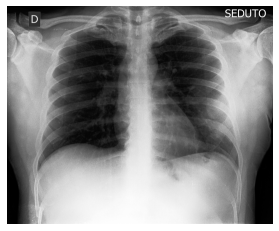

In [ ]:
sample_image_path = "COVID19/02.jpeg"
sampleImage(sample_image_path)

NORMAL

(1066, 1412, 3)


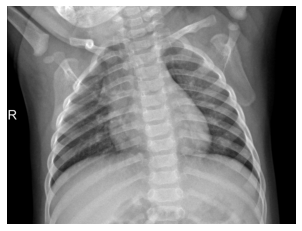

In [ ]:
sample_image_path = "NORMAL/NORMAL2-IM-0749-0001.jpeg"
sampleImage(sample_image_path)

PNEUMONIA

(1066, 1412, 3)


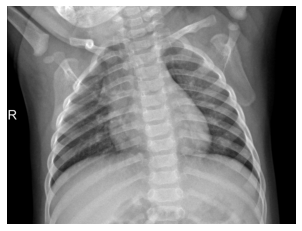

In [ ]:
sample_image_path = "NORMAL/NORMAL2-IM-0749-0001.jpeg"
sampleImage(sample_image_path)

TUBERCULOSIS

(512, 512, 3)


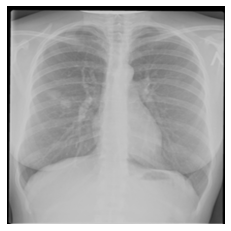

In [ ]:
sample_image_path = "TUBERCULOSIS/Tuberculosis-158.png"
sampleImage(sample_image_path)

As we can see , dimension of every images is different , that is why we must be set each images at same dimension.

# Data Preprocessing

In [ ]:
labels = ['COVID19','NORMAL','PNEUMONIA','TUBERCULOSIS']

In [ ]:
X_train = []
y_train = []
image_size = 300
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/CovidDataset2','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/CovidDataset2','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 41/41 [00:12<00:00,  3.32it/s]


# SAMPLE IMAGE FROM EACH LABEL

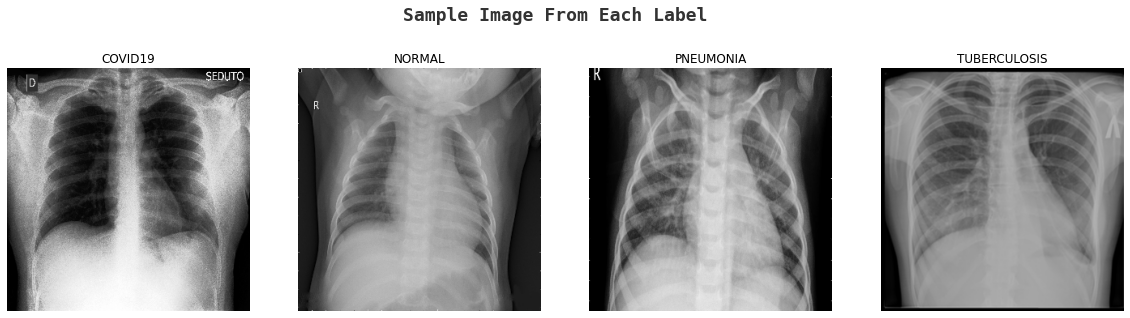

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape

(2771, 300, 300, 3)

# Dividing the dataset as a Train & Test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.3,random_state=101)

Performing One Hot Encoding on the labels after converting it into numerical values

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Building EfficientNet

In [ ]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16719872/16705208 [==============================] - 0s 0us/step


# Layers of the EfficientNet

In [ ]:
efficientNet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 300, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 301, 301, 3)  0           ['normalization[0][0

# Visualize of the EfficientNet

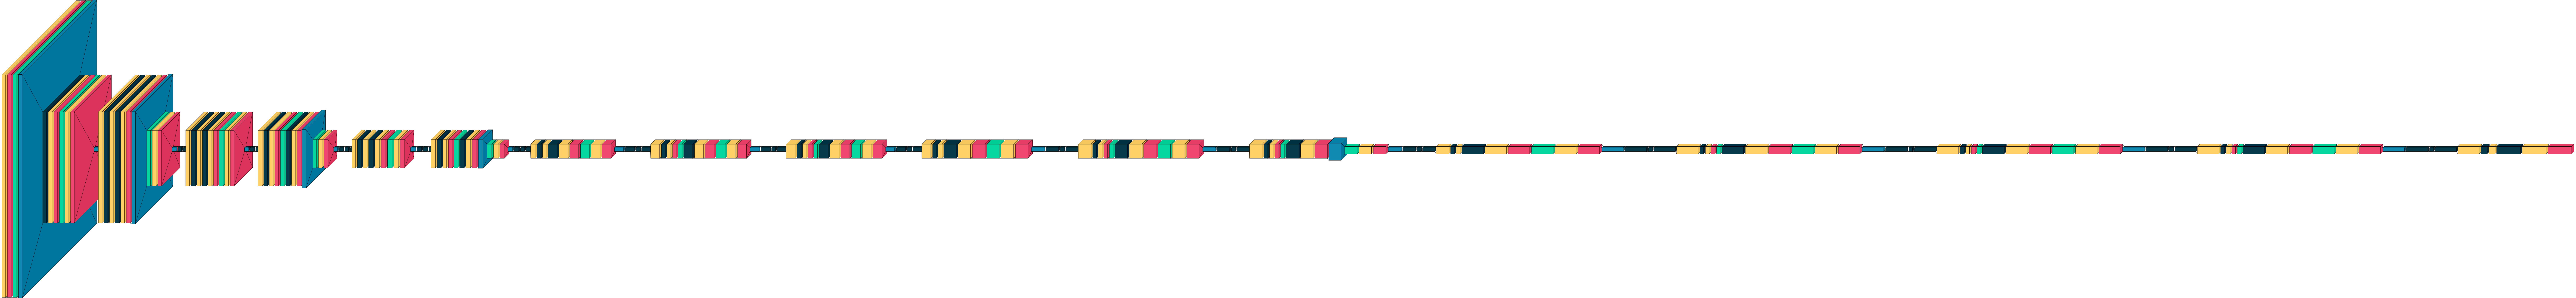

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
model = efficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = model)

Layers of the Model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 300, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 301, 301, 3)  0           ['normalization[0][0]']      

# Visualize of the Model

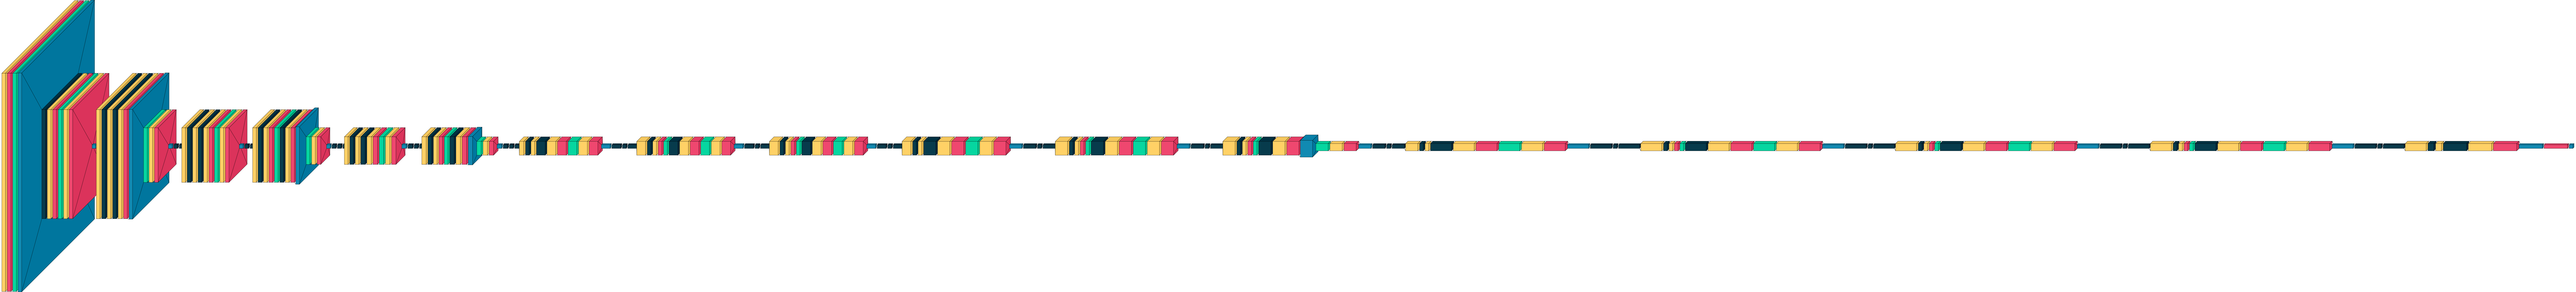

In [ ]:
visualkeras.layered_view(model)

# Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("CovidModelEfficientNetB0_V2.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)

# Training the Model

In [ ]:
hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =15, 
                 verbose=1, 
                 batch_size=32,
                 callbacks=[tensorboard,checkpoint,reduce_lr]
                 )

Epoch 1/15
55/55 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9123
Epoch 00001: val_accuracy improved from -inf to 0.67526, saving model to CovidModelEfficientNetB0_V2.h5
55/55 [==============================] - 48s 437ms/step - loss: 0.2845 - accuracy: 0.9123 - val_loss: 0.9909 - val_accuracy: 0.6753 - lr: 0.0010
Epoch 2/15
55/55 [==============================] - ETA: 0s - loss: 0.1000 - accuracy: 0.9673
Epoch 00002: val_accuracy improved from 0.67526 to 0.84536, saving model to CovidModelEfficientNetB0_V2.h5
55/55 [==============================] - 22s 404ms/step - loss: 0.1000 - accuracy: 0.9673 - val_loss: 1.0714 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 3/15
55/55 [==============================] - ETA: 0s - loss: 0.0880 - accuracy: 0.9754
Epoch 00003: val_accuracy improved from 0.84536 to 0.95361, saving model to CovidModelEfficientNetB0_V2.h5
55/55 [==============================] - 22s 408ms/step - loss: 0.0880 - accuracy: 0.9754 - val_loss: 0.1864 -

# Accuracy of the Model

In [ ]:
results = model.evaluate(X_train,y_train)

61/61 [==============================] - 4s 70ms/step - loss: 0.0113 - accuracy: 0.9974


In [ ]:
model.evaluate(X_test,y_test)

26/26 [==============================] - 3s 66ms/step - loss: 0.0579 - accuracy: 0.9820


[0.057911332696676254, 0.9819711446762085]

# Visualize of the Graph

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


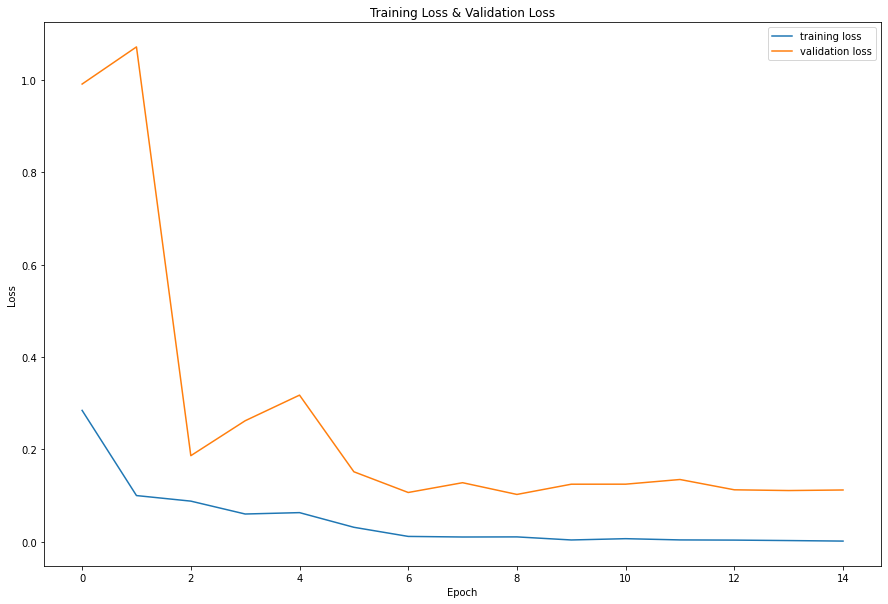

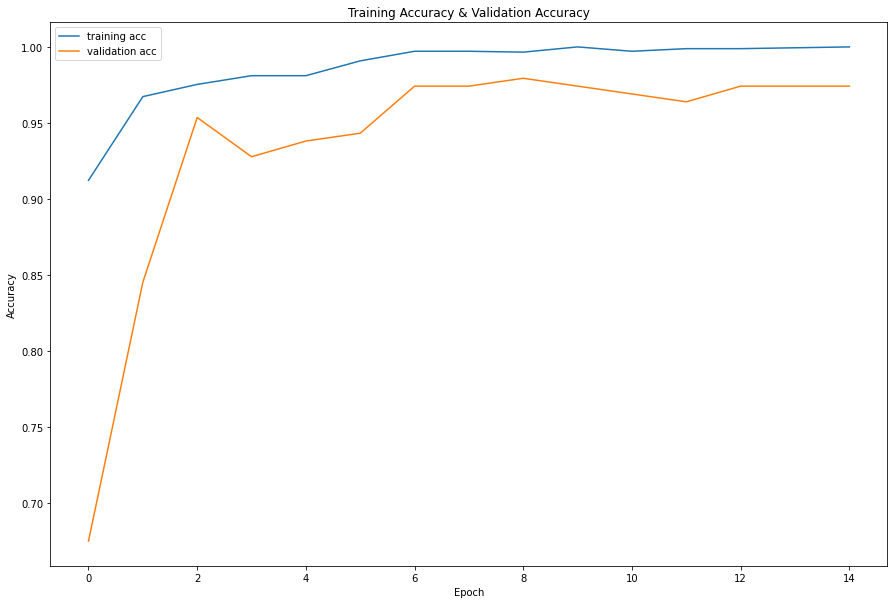

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# CLASSIFICATION REPORT

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       184
           1       0.98      0.96      0.97       212
           2       0.97      0.98      0.98       278
           3       0.98      1.00      0.99       158

    accuracy                           0.98       832
   macro avg       0.98      0.98      0.98       832
weighted avg       0.98      0.98      0.98       832



# CONFUSION MATRIX

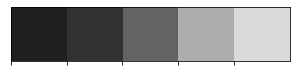

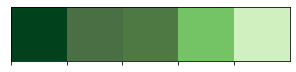

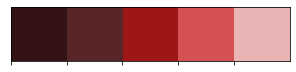

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[182   0   0   2]
 [  0 204   8   0]
 [  0   4 273   1]
 [  0   0   0 158]]


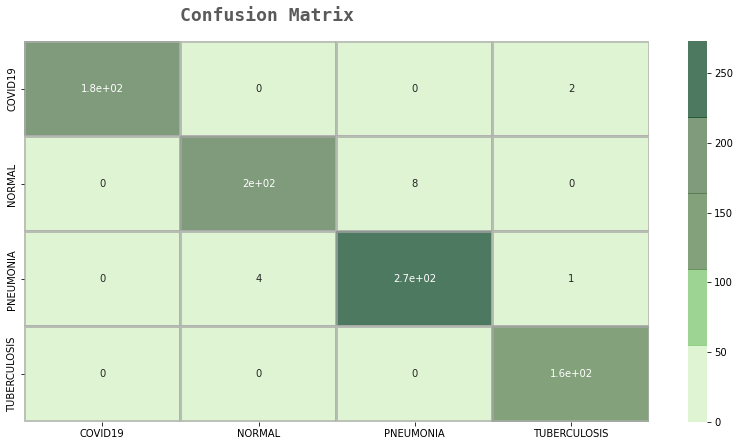

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()